In [1]:
# Import all libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import itertools
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
# Load data from CSV file
diabetes_data = pd.read_csv('Pima_diabetes.csv')

In [3]:
# Properties of dataset
diabetes_data.shape         # Size row*column

(768, 9)

In [4]:
diabetes_data.head(77)      # return first 77 rows of dataset

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
72,13,126,90,0,0,43.4,0.583,42,1
73,4,129,86,20,270,35.1,0.231,23,0
74,1,79,75,30,0,32.0,0.396,22,0
75,1,0,48,20,0,24.7,0.140,22,0


True cases / diabetes=YES : 268
False cases / diabetes=NO : 500
True cases in percentage : 34.89583333333333 %
False cases in percentage: 65.10416666666666 %


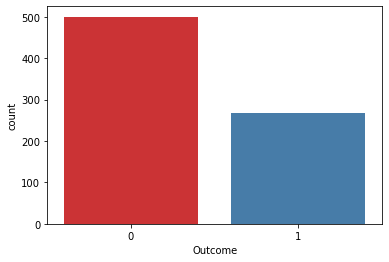

In [5]:
# Data visualization
sns.countplot(x = 'Outcome',data = diabetes_data,palette="Set1")     # To count how many zero's and one's in Outcome column
total_obs = len(diabetes_data)
total_true = len(diabetes_data.loc[diabetes_data['Outcome'] == 1])
total_false = len(diabetes_data.loc[diabetes_data['Outcome'] == 0])
print("True cases / diabetes=YES : {0}".format(total_true))
print("False cases / diabetes=NO : {0}".format(total_false))
true_case_in_per=(total_true/total_obs)*100
false_case_in_per=(total_false/total_obs)*100
print("True cases in percentage : {0} %".format(true_case_in_per))
print("False cases in percentage: {0} %".format(false_case_in_per))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C991572C48>,
      dtype=object)

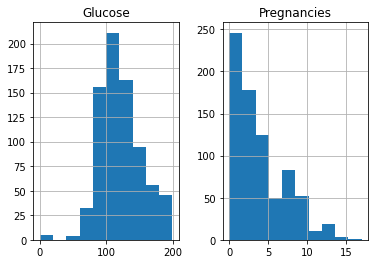

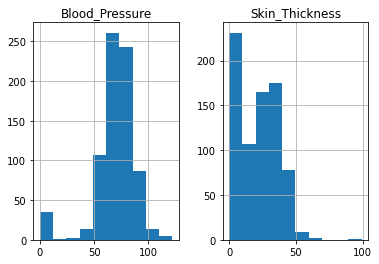

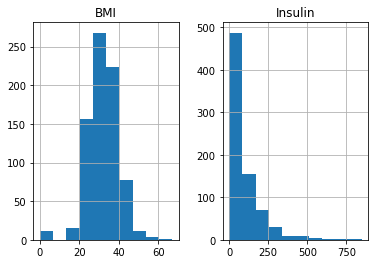

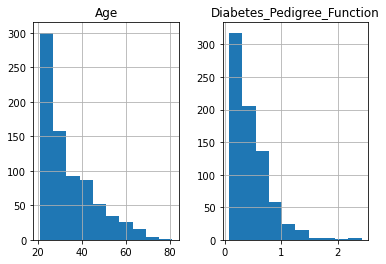

In [6]:
# Histogram plot for each feature
feat_set1=['Pregnancies', 'Glucose']
feat_set2=['Blood_Pressure','Skin_Thickness']
feat_set3=['Insulin', 'BMI']
feat_set4=['Diabetes_Pedigree_Function', 'Age']

diabetes_data.hist(feat_set1,rwidth=20)
diabetes_data.hist(feat_set2,rwidth=20)
diabetes_data.hist(feat_set3,rwidth=20)
diabetes_data.hist(feat_set4,rwidth=20)

In [7]:
diabetes_data.corr()        # for finding the pairwise correlation of all columns in diabetes_data

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Blood_Pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin_Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Diabetes_Pedigree_Function,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


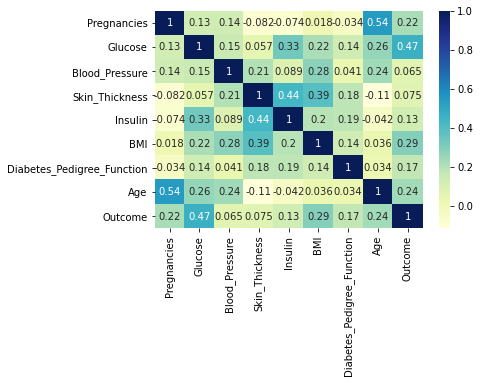

In [8]:
# Correlation Heatmap for dataset
sns.heatmap(diabetes_data.corr(), annot = True,cmap="YlGnBu")
plt.show()

In [9]:
# Preprocessing starts
any_null = diabetes_data.isnull().values.any()       # Check if there is any null value
print (any_null)

False


In [10]:
dataset_copy=diabetes_data                # Copy of dataset created

In [11]:
# Analyse each features of dataset to remove anomalies
# 1) Glucose = 0 is not realistic so replace it with mean value
dataset_copy[["Glucose"]] = dataset_copy[["Glucose"]].replace(0, np.NaN)
dataset_copy["Glucose"].fillna(dataset_copy["Glucose"].median(), inplace = True)      # Nan = mean value
dataset_copy.head(77)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72,35,0,33.6,0.627,50,1
1,1,85.0,66,29,0,26.6,0.351,31,0
2,8,183.0,64,0,0,23.3,0.672,32,1
3,1,89.0,66,23,94,28.1,0.167,21,0
4,0,137.0,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
72,13,126.0,90,0,0,43.4,0.583,42,1
73,4,129.0,86,20,270,35.1,0.231,23,0
74,1,79.0,75,30,0,32.0,0.396,22,0
75,1,117.0,48,20,0,24.7,0.140,22,0


In [12]:
# 2) Skin Thickness  = 0 is not realistic so replace it with mean value
dataset_copy[["Skin_Thickness"]] = dataset_copy[["Skin_Thickness"]].replace(0, np.NaN)
dataset_copy["Skin_Thickness"].fillna(dataset_copy["Skin_Thickness"].median(), inplace = True) 
dataset_copy.head(5)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72,35.0,0,33.6,0.627,50,1
1,1,85.0,66,29.0,0,26.6,0.351,31,0
2,8,183.0,64,29.0,0,23.3,0.672,32,1
3,1,89.0,66,23.0,94,28.1,0.167,21,0
4,0,137.0,40,35.0,168,43.1,2.288,33,1


In [13]:
# 3) Blood pressure  = 0 is not realistic so replace it with mean value
dataset_copy[["Blood_Pressure"]] = dataset_copy[["Blood_Pressure"]].replace(0, np.NaN)
dataset_copy["Blood_Pressure"].fillna(dataset_copy["Blood_Pressure"].median(), inplace = True) 
dataset_copy.head(10)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
5,5,116.0,74.0,29.0,0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88,31.0,0.248,26,1
7,10,115.0,72.0,29.0,0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543,30.5,0.158,53,1
9,8,125.0,96.0,29.0,0,0.0,0.232,54,1


In [14]:
# 4) BMI  = 0 is not realistic so replace it with mean value
dataset_copy[["BMI"]] = dataset_copy[["BMI"]].replace(0, np.NaN)
dataset_copy["BMI"].fillna(dataset_copy["BMI"].median(), inplace = True) 
dataset_copy.head(10)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1
5,5,116.0,74.0,29.0,0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88,31.0,0.248,26,1
7,10,115.0,72.0,29.0,0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543,30.5,0.158,53,1
9,8,125.0,96.0,29.0,0,32.3,0.232,54,1


In [15]:
# 5) Insulin  = 0 is not realistic so replace it with mean value
dataset_copy[["Insulin"]] = dataset_copy[["Insulin"]].replace(0, np.NaN)
dataset_copy["Insulin"].fillna(dataset_copy["Insulin"].median(), inplace = True) 
dataset_copy.head(10)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaled_data = MinMaxScaler(feature_range = (0, 1))
data_scaled = scaled_data.fit_transform(dataset_copy.loc[:,dataset_copy.columns!='Outcome'])




data_scaled = pd.DataFrame(data_scaled)
data_scaled.describe()

,0,1,2,3,4,5,6,7
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501008,0.493742,0.240305,0.152250,0.291518,0.168179,0.204015
std,0.198210,0.196376,0.123435,0.095557,0.103826,0.140597,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000
50%,0.176471,0.470968,0.489796,0.239130,0.133413,0.288344,0.125747,0.133333
75%,0.352941,0.620968,0.571429,0.271739,0.136118,0.376278,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

X = data_scaled.iloc[:, [0,1,2,3,4,5,6,7]].values               # frame independent variables 
y = dataset_copy.iloc[:, 8].values               # frame dependent variable 

X_for_train, X_for_test, y_for_train, y_for_test = train_test_split(X, y, test_size=0.2, random_state=42)     #train:test = 85%:15%

print("Shape of train X:{0} , Shape of test X:{1} , Shape of train y:{2} , Shape of text y:{3}".format(X_for_train.shape, X_for_test.shape, y_for_train.shape, y_for_test.shape))



Shape of train X:(614, 8) , Shape of test X:(154, 8) , Shape of train y:(614,) , Shape of text y:(154,)


In [18]:
# Training of model Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
LOR_train = LogisticRegression(C=0.4,random_state = 42,max_iter=100).fit(X_for_train,y_for_train.ravel())

In [19]:
# Testing of model Logistic regression
LOR_test = LOR_train.predict(X_for_test)

Confusion Matrix for logistic regression:
[[33 22]
 [ 7 92]]
Classification Report for logistic regression:
              precision    recall  f1-score   support

           1       0.82      0.60      0.69        55
           0       0.81      0.93      0.86        99

    accuracy                           0.81       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154

Logistic regression testing accuracy : 81.1688

Confusion Matrix Heatmap for logistic regression:


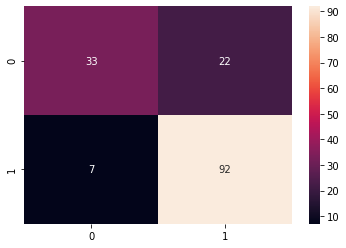

In [20]:
# Evaluation of LR model
print ("Confusion Matrix for logistic regression:")
print (metrics.confusion_matrix(y_for_test,LOR_test, labels=[1, 0]))
print ("Classification Report for logistic regression:")
print (metrics.classification_report(y_for_test,LOR_test, labels=[1, 0]))
accuracy_LOR= metrics.accuracy_score(y_for_test,LOR_test)
print("Logistic regression testing accuracy : {0:.4f}".format(accuracy_LOR*100))
print("")
print("Confusion Matrix Heatmap for logistic regression:")
cm_heatmap = confusion_matrix(y_for_test, LOR_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [21]:
# Training of SVM model
from sklearn.svm import SVC
SVM_train = SVC(C=0.2,kernel = 'linear', random_state = 42).fit(X_for_train,y_for_train.ravel())

In [22]:
# Testing of SVM model
from sklearn import metrics
SVM_test = SVM_train.predict(X_for_test)

Confusion Matrix for SVM:
[[33 22]
 [ 7 92]]
Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.82      0.60      0.69        55
           0       0.81      0.93      0.86        99

    accuracy                           0.81       154
   macro avg       0.82      0.76      0.78       154
weighted avg       0.81      0.81      0.80       154

SVM testing accuracy : 81.1688

Confusion Matrix Heatmap for SVM:


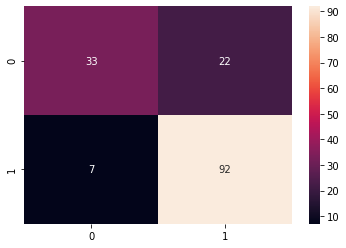

In [23]:
# Evaluation of SVM model
print ("Confusion Matrix for SVM:")
print (metrics.confusion_matrix(y_for_test,SVM_test, labels=[1, 0]))
print ("Classification Report for SVM:")
print (metrics.classification_report(y_for_test,SVM_test, labels=[1, 0]))
accuracy_SVM = metrics.accuracy_score(y_for_test,SVM_test)
print ("SVM testing accuracy : {0:.4f}".format(accuracy_SVM*100))
print("")
print("Confusion Matrix Heatmap for SVM:")
cm_heatmap = confusion_matrix(y_for_test, SVM_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [24]:
# Training of KNN classifier
from sklearn.neighbors import KNeighborsClassifier
KNN_train = KNeighborsClassifier(n_neighbors = 56, metric = 'minkowski', p = 2).fit(X_for_train,y_for_train.ravel())

In [25]:
# Testing of KNN classifier
from sklearn import metrics
KNN_test = KNN_train.predict(X_for_test)

Confusion Matrix for KNN:
[[33 22]
 [12 87]]
Classification Report for KNN:
              precision    recall  f1-score   support

           1       0.73      0.60      0.66        55
           0       0.80      0.88      0.84        99

    accuracy                           0.78       154
   macro avg       0.77      0.74      0.75       154
weighted avg       0.78      0.78      0.77       154

KNN testing accuracy : 77.9221

Confusion Matrix Heatmap for KNN:


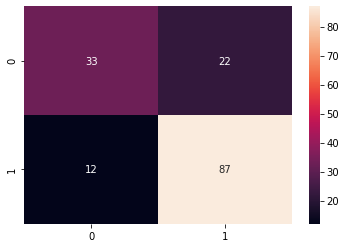

In [26]:
# Evaluation of KNN model
print ("Confusion Matrix for KNN:")
print (metrics.confusion_matrix(y_for_test,KNN_test, labels=[1, 0]))
print ("Classification Report for KNN:")
print (metrics.classification_report(y_for_test,KNN_test, labels=[1, 0]))
accuracy_KNN = metrics.accuracy_score(y_for_test,KNN_test)
print ("KNN testing accuracy : {0:.4f}".format(accuracy_KNN*100))
print("")
print("Confusion Matrix Heatmap for KNN:")
cm_heatmap = confusion_matrix(y_for_test, KNN_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [27]:
# Training of Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
DT_train = DecisionTreeClassifier(criterion = 'entropy', random_state = 42).fit(X_for_train,y_for_train.ravel())

In [28]:
# Testing of Decision tree classifier
from sklearn import metrics
DT_test = DT_train.predict(X_for_test)

Confusion Matrix for decision tree:
[[35 20]
 [23 76]]
Classification Report for decision tree:
              precision    recall  f1-score   support

           1       0.60      0.64      0.62        55
           0       0.79      0.77      0.78        99

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154

Decision tree testing accuracy : 72.0779

Confusion Matrix Heatmap for decision tree:


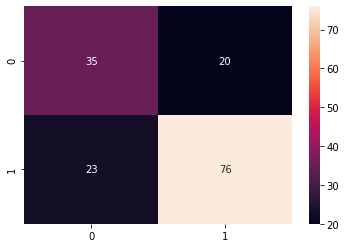

In [29]:
#Evaluation of Decision tree model
print ("Confusion Matrix for decision tree:")
print (metrics.confusion_matrix(y_for_test,DT_test, labels=[1, 0]))
print ("Classification Report for decision tree:")
print (metrics.classification_report(y_for_test,DT_test, labels=[1, 0]))
accuracy_DT = metrics.accuracy_score(y_for_test,DT_test)
print ("Decision tree testing accuracy : {0:.4f}".format(accuracy_DT*100))
print("")
print("Confusion Matrix Heatmap for decision tree:")
cm_heatmap = confusion_matrix(y_for_test, DT_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [30]:
# Training of Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
RF_train = RandomForestClassifier(n_estimators = 22, criterion = 'entropy', random_state = 42).fit(X_for_train,y_for_train.ravel())

In [31]:
# Testing of Random Forest classifier
from sklearn import metrics
RF_test = RF_train.predict(X_for_test)

Confusion Matrix for random forest:
[[40 15]
 [19 80]]
Classification Report for random forest:
              precision    recall  f1-score   support

           1       0.68      0.73      0.70        55
           0       0.84      0.81      0.82        99

    accuracy                           0.78       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.78      0.78      0.78       154

Random Forest testing accuracy: 77.9221

Confusion Matrix Heatmap for random forest:


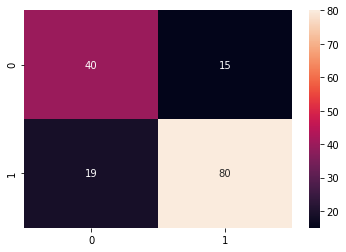

In [32]:
# Evaluation of Random Forest classifier
print ("Confusion Matrix for random forest:")
print (metrics.confusion_matrix(y_for_test,RF_test, labels=[1, 0]))
print ("Classification Report for random forest:")
print (metrics.classification_report(y_for_test,RF_test, labels=[1, 0]))
accuracy_RF = metrics.accuracy_score(y_for_test,RF_test)
print ("Random Forest testing accuracy: {0:.4f}".format(accuracy_RF*100))
print("")
print("Confusion Matrix Heatmap for random forest:")
cm_heatmap = confusion_matrix(y_for_test, RF_test, labels=[1, 0])
sns.heatmap(pd.DataFrame(cm_heatmap), annot=True)

In [33]:
# Neural network

import tensorflow as tf
from tensorflow import keras

c:\users\shubham mishra\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shubham mishra\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shubham mishra\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int1

In [34]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [35]:
callbacks = myCallback()

In [36]:

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(8,)), 
                                  
                                    
                                    
                                    tf.keras.layers.Dense(12, activation=tf.nn.relu),
                                    #tf.keras.layers.Dropout(0.5),
                                    
                                   
                                    
                                    tf.keras.layers.Dense(8, activation=tf.nn.relu),
                                    #tf.keras.layers.Dropout(0.25),
                                    
                                    
                                    #tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    #tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    
                                
                                   tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])
    
    
    



In [37]:
model.compile(optimizer = tf.optimizers.Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [38]:
model.fit(X_for_train, y_for_train, epochs=50,batch_size=9,callbacks=[callbacks],validation_data=(X_for_test, y_for_test))

Train on 614 samples, validate on 154 samples
Epoch 1/50
614/614 [==============================] - 0s 508us/sample - loss: 0.6767 - accuracy: 0.6531 - val_loss: 0.6797 - val_accuracy: 0.6429
Epoch 2/50
614/614 [==============================] - 0s 110us/sample - loss: 0.6698 - accuracy: 0.6531 - val_loss: 0.6742 - val_accuracy: 0.6429
Epoch 3/50
614/614 [==============================] - 0s 89us/sample - loss: 0.6637 - accuracy: 0.6531 - val_loss: 0.6682 - val_accuracy: 0.6429
Epoch 4/50
614/614 [==============================] - 0s 105us/sample - loss: 0.6577 - accuracy: 0.6531 - val_loss: 0.6628 - val_accuracy: 0.6429
Epoch 5/50
614/614 [==============================] - 0s 109us/sample - loss: 0.6509 - accuracy: 0.6531 - val_loss: 0.6541 - val_accuracy: 0.6429
Epoch 6/50
614/614 [==============================] - 0s 108us/sample - loss: 0.6379 - accuracy: 0.6531 - val_loss: 0.6400 - val_accuracy: 0.6429
Epoch 7/50
614/614 [==============================] - 0s 111us/sample - loss: 0

In [39]:
model.evaluate(X_for_test, y_for_test)

154/154 [==============================] - 0s 26us/sample - loss: 0.5033 - accuracy: 0.7662


[0.5033366912371152, 0.76623374]